In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\kicph\python_code\ECE143\project\ECE143Project\select\employment_education_with Value_for 2010 (1).xlsx",sheet_name='CA')
data = pd.read_csv(r"C:\Users\kicph\python_code\ECE143\project\ECE143Project\select\2010_data.csv")

In [2]:
df.dropna(subset = ["value_2010_avg"], inplace=True)

In [3]:
# df_s = df.loc[:, ['County_Name','value_2010_avg','Population_2010','Unemployment_rate_2010',"Civilian_labor_force_2010"]]
# df_s.to_csv(r'C:\Users\kicph\python_code\ECE143\project\ECE143Project\select\2010_data.csv')


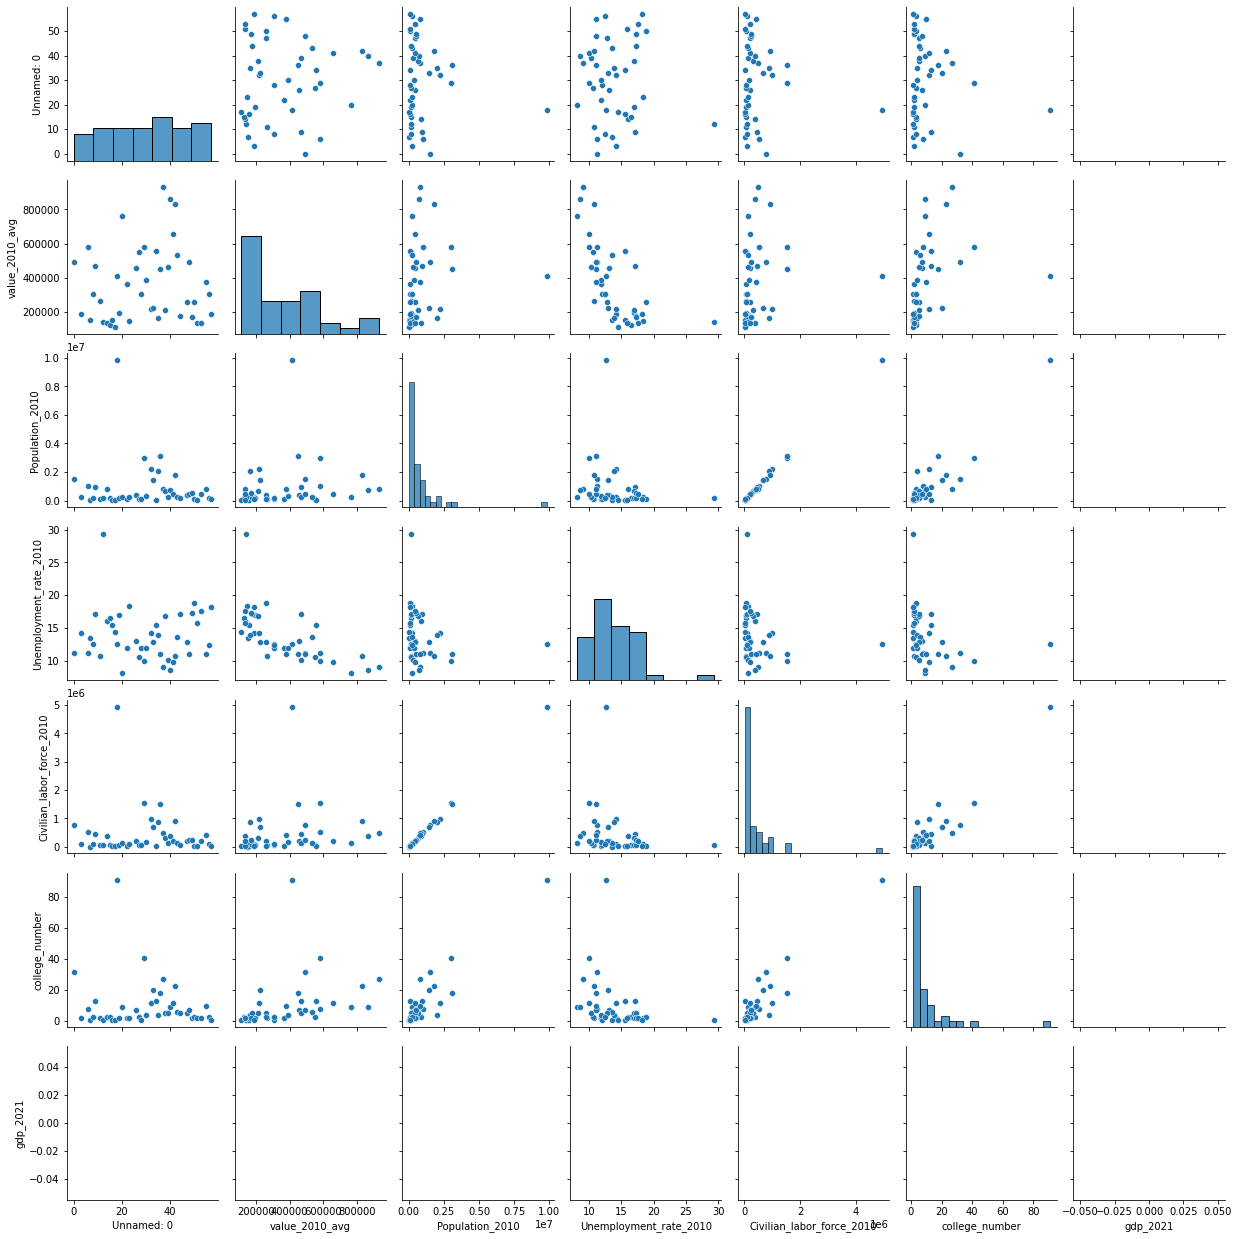

In [4]:
import seaborn as sns
sns.pairplot(data) 

<AxesSubplot:>

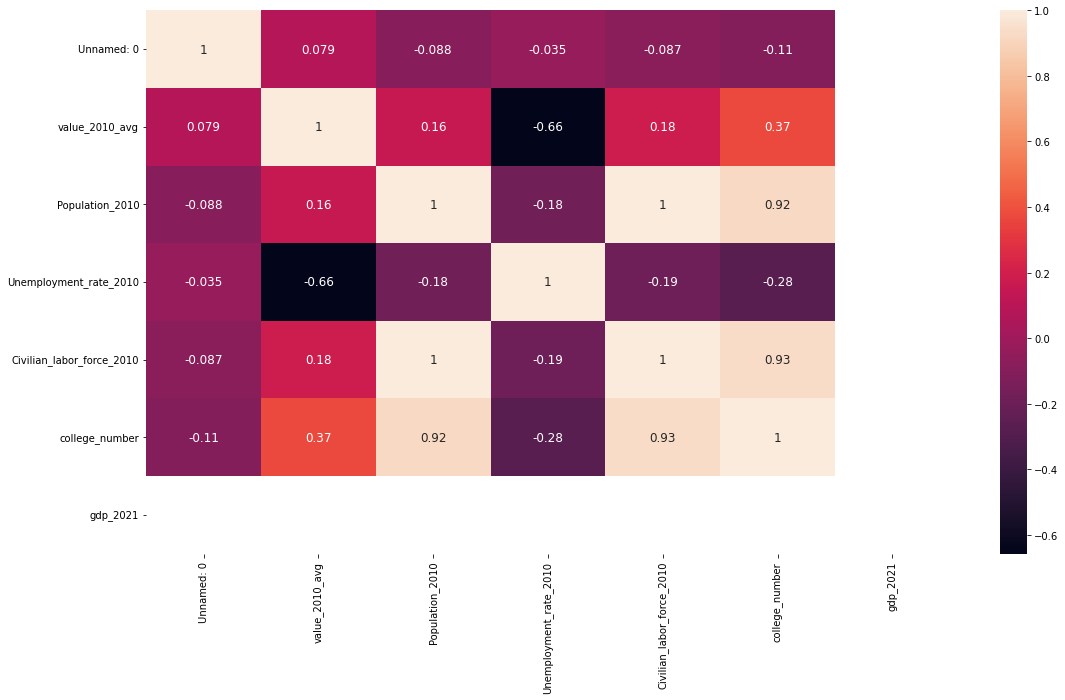

In [5]:
import matplotlib.pyplot as plt
import numpy as np
corrmat = data.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\kicph\python_code\ECE143\project\ECE143Project\select\2019_data_drp.csv",header = [0,1])
# data = df.values # note that the data is array type
# index1 = list(df.keys()) # title list
# data = list(map(list, zip(*data))) # map()convert to list
# data = pd.DataFrame(data, index=index1) # swap row and column
# data.to_csv(r"C:\Users\kicph\python_code\ECE143\project\ECE143Project\select\2019_data.csv")

df.columns.tolist()

[('Subject', 'Title'),
 ('Sex and Age', 'Total population'),
 ('Sex and Age', 'Male'),
 ('Sex and Age', 'Female'),
 ('Sex and Age', 'Under 5 years'),
 ('Sex and Age', '5 to 9 years'),
 ('Sex and Age', '10 to 14 years'),
 ('Sex and Age', '15 to 19 years'),
 ('Sex and Age', '20 to 24 years'),
 ('Sex and Age', '25 to 34 years'),
 ('Sex and Age', '35 to 44 years'),
 ('Sex and Age', '45 to 54 years'),
 ('Sex and Age', '55 to 59 years'),
 ('Sex and Age', '60 to 64 years'),
 ('Sex and Age', '65 to 74 years'),
 ('Sex and Age', '75 to 84 years'),
 ('Sex and Age', '85 years and over'),
 ('Sex and Age', 'Median age (years)'),
 ('Sex and Age', '18 years and over'),
 ('Sex and Age', 'rate over 65'),
 ('Sex and Age', '65 years and over'),
 ('Race', 'Total population'),
 ('Race', 'One race'),
 ('Race', 'White'),
 ('Race', 'Black or African American'),
 ('Race', 'American Indian and Alaska Native'),
 ('Race', 'Asian'),
 ('Race', 'Native Hawaiian and Other Pacific Islander'),
 ('Race', 'Some other race

In [7]:
idx = pd.IndexSlice
data = df.loc[:,[idx['Value','Median (dollars)'],idx['Sex and Age','rate over 65'],idx['Sex and Age','Median age (years)'],idx["Disability Status of the Civilian Noninstitutionalized Population","With a disability"],idx["Residence 1 Year Ago",'Different house in the U.S.'],idx['Employment Status','Unemployment Rate'],idx['Commuting to Work','Public transportation (excluding taxicab)'],idx['Commuting to Work','Walked'],idx['Commuting to Work','Worked from home'],idx['Commuting to Work','Mean travel time to work (minutes)'],idx['Year Householder Moved into Unit','Moved in 2000 to 2009'],idx['Housing Tenure','Average household size of owner-occupied unit']]]

<AxesSubplot:ylabel='None-None'>

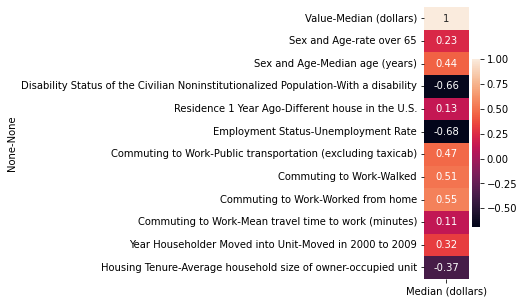

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corrmat = data.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,'Value'], annot = True)

#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
#sns.heatmap(np.array(corrmat.iloc[0,:]).reshape((1,12)), annot = True, annot_kws={'size': 12})

<AxesSubplot:>

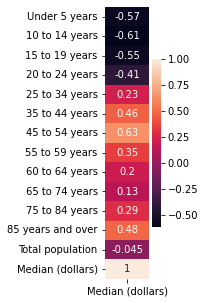

In [9]:
idx = pd.IndexSlice
data_age = df.loc[:, [idx["Sex and Age","Under 5 years"],idx["Sex and Age","10 to 14 years"],idx["Sex and Age","15 to 19 years"],idx["Sex and Age","20 to 24 years"],idx["Sex and Age","25 to 34 years"],idx["Sex and Age","35 to 44 years"],idx["Sex and Age","45 to 54 years"],idx["Sex and Age","55 to 59 years"],idx["Sex and Age","60 to 64 years"],idx["Sex and Age","65 to 74 years"],idx["Sex and Age","75 to 84 years"],idx["Sex and Age","85 years and over"],idx["Sex and Age","Total population"]]]
for column in data_age:
    # print(column)
    data_age[column] = data_age[column]/data_age['Sex and Age', 'Total population']
data_age['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
data_age['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
corrmat = data_age.corr()

fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.droplevel(0).loc[:,'Value'], annot = True)
#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})


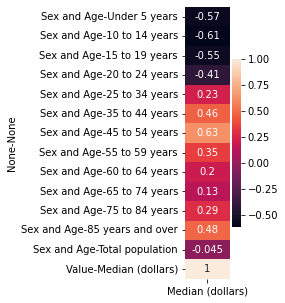

In [10]:
corrmat = data_age.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,'Value'], annot = True)
#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
data_age = data_age.iloc[:,0:-1]

#data_age.rename(columns={idx['Value','Median (dollars)']: "value_key"})

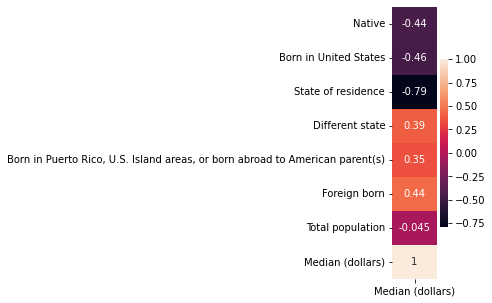

In [11]:
idx = pd.IndexSlice
data_BirthPlace = df.loc[:, [idx["Place of Birth","Native"],idx["Place of Birth","Born in United States"],idx["Place of Birth","State of residence"],idx["Place of Birth","Different state"],idx["Place of Birth","Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)"],idx['Place of Birth','Foreign born'],idx["Sex and Age","Total population"]]]
for column in data_BirthPlace:
    # print(column)
    data_BirthPlace[column] = data_BirthPlace[column]/data_BirthPlace['Sex and Age', 'Total population']
data_BirthPlace['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
data_BirthPlace['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
corrmat = data_BirthPlace.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.droplevel(0).loc[:,'Value'], annot = True)
#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
data_BirthPlace = data_BirthPlace.iloc[:,0:-2]

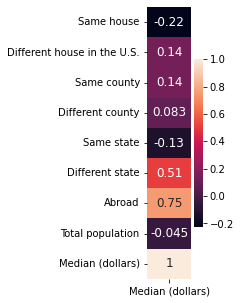

In [12]:
idx = pd.IndexSlice
data_R = df.loc[:, [idx["Residence 1 Year Ago","Same house"],idx["Residence 1 Year Ago","Different house in the U.S."],idx["Residence 1 Year Ago","Same county"],idx["Residence 1 Year Ago","Different county"],idx["Residence 1 Year Ago","Same state"],idx['Residence 1 Year Ago','Different state'],idx["Residence 1 Year Ago","Abroad"],idx[['Sex and Age', 'Total population']]]]
for column in data_R:
    # print(column)
    data_R[column] = data_R[column]/data_R['Sex and Age', 'Total population']
data_R['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
data_R['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
corrmat = data_R.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.droplevel(0).loc[:,'Value'], annot = True, annot_kws={'size': 12})
data_R = data_R.iloc[:,0:-2]



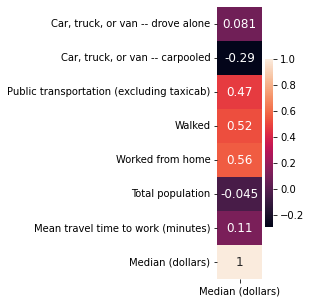

In [13]:
idx = pd.IndexSlice
data_Commuting = df.loc[:, [idx['Commuting to Work','Car, truck, or van -- drove alone'],idx['Commuting to Work','Car, truck, or van -- carpooled'],idx['Commuting to Work','Public transportation (excluding taxicab)'],idx['Commuting to Work','Walked'],idx["Commuting to Work","Worked from home"],idx['Sex and Age', 'Total population']]]
for column in data_Commuting:
    # print(column)
    data_Commuting[column] = data_Commuting[column]/data_Commuting['Sex and Age', 'Total population']

data_Commuting['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
data_Commuting['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Commuting['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
# data_Commuting.drop(index = 0)
corrmat = data_Commuting.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.droplevel(0).loc[:,'Value'], annot = True, annot_kws={'size': 12})


data_Commuting = data_Commuting.iloc[:,0:-1]
data_Commuting = data_Commuting.drop(data_Commuting.columns[-2] ,axis = 1)

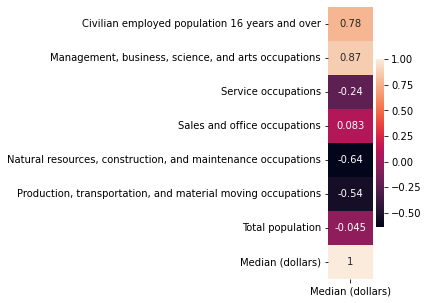

In [42]:
idx = pd.IndexSlice
data_Occupation = df.loc[:, [idx['Occupation','Civilian employed population 16 years and over'],idx['Occupation','Management, business, science, and arts occupations'],idx['Occupation','Service occupations'],idx['Occupation','Sales and office occupations'],idx['Occupation','Natural resources, construction, and maintenance occupations'],idx["Occupation","Production, transportation, and material moving occupations"],idx['Sex and Age', 'Total population']]]
for column in data_Occupation:
    # print(column)
    data_Occupation[column] = data_Occupation[column]/data_Occupation['Sex and Age', 'Total population']
data_Occupation['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
#data_Occupation['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Occupation['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
# data_Occupation.drop(index = 0)
corrmat = data_Occupation.corr()
fig, ax = plt.subplots(figsize = (1, 5))

sns.heatmap(corrmat.droplevel(0).loc[:,'Value'], annot = True)
#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
data_Occupation = data_Occupation.iloc[:,0:-2]


C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2933611041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Industry['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2933611041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Industry[column] = data_Industry[column]/data_Industry['Sex and Age', 'Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2933611041.py:7: SettingWithCopyWarning: 

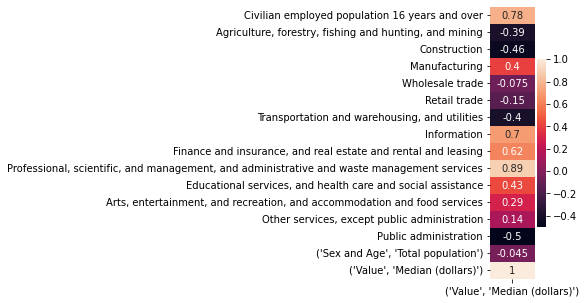

In [41]:
idx = pd.IndexSlice
data_Industry = df.loc[:, 'Industry']
data_Industry['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
for column in data_Industry:
    # print(column)
    data_Industry[column] = data_Industry[column]/data_Industry['Sex and Age', 'Total population']
data_Industry['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
#data_Industry['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Industry['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
corrmat = data_Industry.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True)
#sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})
data_Industry = data_Industry.iloc[:,0:-2]


C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\700490011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Worker['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\700490011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Worker[column] = data_Worker[column]/data_Worker['Sex and Age', 'Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\700490011.py:7: SettingWithCopyWarning: 
A value is

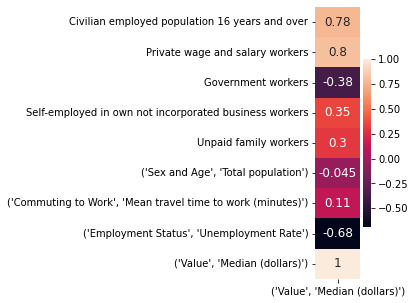

In [43]:
idx = pd.IndexSlice
data_Worker = df.loc[:, 'Class of Worker']
data_Worker['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
for column in data_Worker:
    # print(column)
    data_Worker[column] = data_Worker[column]/data_Worker['Sex and Age', 'Total population']
data_Worker['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
data_Worker['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Worker['Employment Status','Unemployment Rate'] = df.loc[:,idx['Employment Status','Unemployment Rate']]
data_Worker['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
corrmat = data_Worker.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})
data_Worker = data_Worker.iloc[:,0:-2]
data_Worker = data_Worker.drop(data_Worker.columns[-3],axis = 1)

C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2889574690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Income['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2889574690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Income[column] = data_Income[column]/data_Income['Sex and Age', 'Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\2889574690.py:7: SettingWithCopyWarning: 
A value

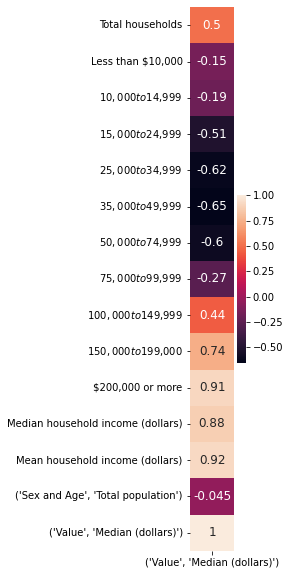

In [44]:
idx = pd.IndexSlice
data_Income = df.loc[:, 'Income and Benefits (In 2019 inflation-adjusted dollars)']
data_Income['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
for column in data_Income:
    # print(column)
    data_Income[column] = data_Income[column]/data_Income['Sex and Age', 'Total population']
data_Income['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
#data_Income['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Income['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]

corrmat = data_Income.corr()
fig, ax = plt.subplots(figsize = (1, 10))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})
data_Worker = data_Worker.iloc[:,0:-2]

C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\3979786495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Health['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\3979786495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Health[column] = data_Health[column]/data_Health['Sex and Age', 'Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\3979786495.py:7: SettingWithCopyWarning: 
A value

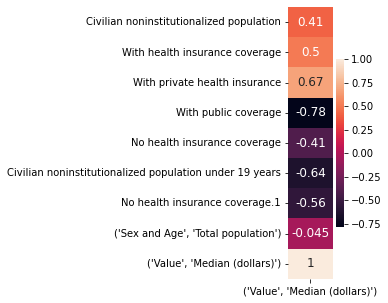

In [45]:
idx = pd.IndexSlice
data_Health = df.loc[:, 'Health Insurance Coverage']
data_Health['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
for column in data_Health:
    # print(column)
    data_Health[column] = data_Health[column]/data_Health['Sex and Age', 'Total population']
data_Health['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
data_Health['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
corrmat = data_Health.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})
data_Worker = data_Worker.iloc[:,0:-2]

C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\1865940473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Education['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\1865940473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Education[column] = data_Education[column]/data_Education['Sex and Age', 'Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\1865940473.py:7: SettingWithCopyWarni

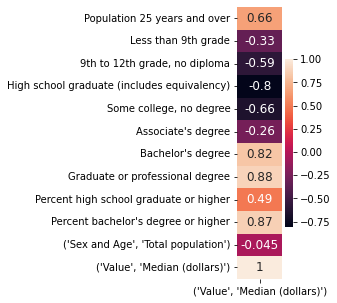

In [46]:
idx = pd.IndexSlice
data_Education = df.loc[:, 'Educational Attainment']
data_Education['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
for column in data_Education.columns[0:-3]:
    # print(column)
    data_Education[column] = data_Education[column]/data_Education['Sex and Age', 'Total population']
data_Education['Sex and Age', 'Total population'] = df.loc[:,idx['Sex and Age', 'Total population']]
#data_Education['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Education['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
corrmat = data_Education.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})
# print(data_Education)
# data_Education.rename(columns={idx['Value','Median (dollars)']: "value_key"})

data_Education = data_Education.iloc[:,0:-2]


C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\486849992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Race[column] = data_Race[column]/data_Race['Total population']
C:\Users\kicph\AppData\Local\Temp\ipykernel_14668\486849992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Race['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]


<AxesSubplot:>

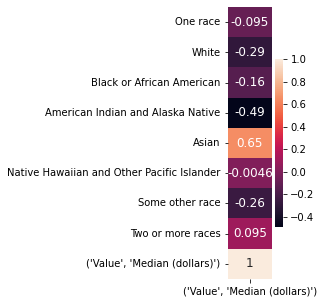

In [47]:
idx = pd.IndexSlice
data_Race = df.loc[:, 'Race']
for column in data_Race.columns[1:]:
    # print(column)
    data_Race[column] = data_Race[column]/data_Race['Total population']
#data_Race['Commuting to Work','Mean travel time to work (minutes)'] = df.loc[:,idx['Commuting to Work','Mean travel time to work (minutes)']]
data_Race['Value','Median (dollars)'] = df.loc[:,idx['Value','Median (dollars)']]
data_Race = data_Race.iloc[:,1:]
corrmat = data_Race.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})

In [87]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
threshold_list = np.arange(0.1,1,0.1)
list_of_train =pd.concat([data_age,data_BirthPlace,data_R,data_Commuting,data_Occupation,data_Industry,data_Worker,data_Income,data_Health,data_Education,data_Race], axis=1)
def Trainset_selected(list_of_train):
    X = list_of_train.iloc[:,0:-1]
    y = list_of_train.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # print("X is :", X_train)
    return X_train, X_test, y_train, y_test

a,b,c,d = Trainset_selected(list_of_train)
print(a,c)

    (Sex and Age, Under 5 years)  (Sex and Age, 10 to 14 years)  \
38                      0.056336                       0.060631   
41                      0.070017                       0.076935   
24                      0.057783                       0.083929   
42                      0.069405                       0.066250   
40                      0.068320                       0.084607   
35                      0.048061                       0.064993   
26                      0.050634                       0.055525   
13                      0.048097                       0.051334   
22                      0.066795                       0.079813   
44                      0.057090                       0.059438   
27                      0.044386                       0.046062   
17                      0.059083                       0.071362   
48                      0.063335                       0.066440   
33                      0.054196                       0.05660

In [88]:
from sklearn import metrics
def find_the_score(X_train,X_test, y_train,y_test):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    # print (linreg.intercept_)
    # print (linreg.coef_)
    y_pred = linreg.predict(X_test)
#     print("r2_score:",metrics.r2_score(y_test, y_pred)) 
# # MSE
#     print("MSE:",metrics.mean_squared_error(y_test, y_pred)) 
# # RMSE
#     print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
    return metrics.r2_score(y_test, y_pred),metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [89]:
from sklearn.svm import SVR
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
def svd_score(X_train,X_test, y_train,y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    return metrics.r2_score(y_test, y_pred),metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [90]:
from sklearn.ensemble import RandomForestRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
def rfr_score(X_train,X_test, y_train,y_test):
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    return metrics.r2_score(y_test, y_pred),metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [91]:
def avg_score(X_train,X_test, y_train,y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred_1 = svr.predict(X_test)
    
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    y_pred_2 = rfr.predict(X_test)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_3 = linreg.predict(X_test)
    
    y_pred = (y_pred_1+y_pred_2+y_pred_3)/3
    return metrics.r2_score(y_test, y_pred),metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))    

[1, 6, 15, 25, 32, 33, 36, 38, 45, 46, 47, 52, 53, 58, 59, 63, 64, 65, 66, 68, 71, 72, 74, 77, 78, 81, 82, 84, 85, 87, 92]
    (Sex and Age, Under 5 years)  (Sex and Age, 10 to 14 years)  \
0                       5.409008                       5.925650   
1                       4.505007                       6.207635   
2                       6.576115                       6.252621   
3                       4.958525                       6.387783   
4                       5.096602                       6.138785   
5                       7.265875                       6.644474   
6                       5.348581                       6.548711   
7                       7.862455                       7.967942   
8                       6.232324                       8.493979   
9                       6.780858                       8.058740   
10                      5.964567                       5.886449   
11                      4.590779                       3.492198   
12    

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings

[15, 25, 32, 33, 38, 47, 52, 53, 63, 64, 65, 66, 68, 72, 77, 81, 84, 85, 87]
    (Sex and Age, Under 5 years)  (Sex and Age, 10 to 14 years)  \
0                       5.409008                       5.925650   
1                       4.505007                       6.207635   
2                       6.576115                       6.252621   
3                       4.958525                       6.387783   
4                       5.096602                       6.138785   
5                       7.265875                       6.644474   
6                       5.348581                       6.548711   
7                       7.862455                       7.967942   
8                       6.232324                       8.493979   
9                       6.780858                       8.058740   
10                      5.964567                       5.886449   
11                      4.590779                       3.492198   
12                      5.555939                    

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings

[33, 47, 64, 65, 66, 68, 77, 84, 85, 87]
    (Sex and Age, Under 5 years)  (Sex and Age, 10 to 14 years)  \
0                       5.409008                       5.925650   
1                       4.505007                       6.207635   
2                       6.576115                       6.252621   
3                       4.958525                       6.387783   
4                       5.096602                       6.138785   
5                       7.265875                       6.644474   
6                       5.348581                       6.548711   
7                       7.862455                       7.967942   
8                       6.232324                       8.493979   
9                       6.780858                       8.058740   
10                      5.964567                       5.886449   
11                      4.590779                       3.492198   
12                      5.555939                       5.094233   
13                   

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings

[68, 77]
    (Sex and Age, Under 5 years)  (Sex and Age, 10 to 14 years)  \
0                       5.409008                       5.925650   
1                       4.505007                       6.207635   
2                       6.576115                       6.252621   
3                       4.958525                       6.387783   
4                       5.096602                       6.138785   
5                       7.265875                       6.644474   
6                       5.348581                       6.548711   
7                       7.862455                       7.967942   
8                       6.232324                       8.493979   
9                       6.780858                       8.058740   
10                      5.964567                       5.886449   
11                      4.590779                       3.492198   
12                      5.555939                       5.094233   
13                      4.809685                     

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got f

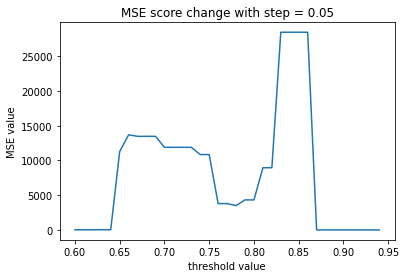

In [92]:
list_of_train =pd.concat([data_age,data_BirthPlace,data_R,data_Commuting,data_Occupation,data_Industry,data_Worker,data_Income,data_Health,data_Education,data_Race], axis=1)
list_of_train = list_of_train*100
list_of_train = list_of_train.iloc[:,0:-1]

list_of_train['value_price'] = df.loc[:,idx['Value','Median (dollars)']]
# print(list_of_train)
corrmat = list_of_train.corr()
abs_c = np.absolute(corrmat)
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt

# print ("ALLLIST IS",list_of_train)
def map_score(t, model='LinearReg'):
    features_l = []
    temp = abs_c.iloc[-1,:]
    for i in range(96):
        if temp[i] > t:    
           features_l.append(i)
    after_threshold = list_of_train.iloc[:,features_l]
    print(features_l)
    print(list_of_train)
    # print(after_threshold)
    x1,x2,x3,x4 = Trainset_selected(after_threshold)  
    # print("Train set is :" , x1)
    # print("Y is",x3)
    if model == 'LinearReg':
        
        return find_the_score(x1,x2,x3,x4)
    elif model == 'SVD':
        return svd_score(x1,x2,x3,x4)
    elif model == "RFR":
        return rfr_score(x1,x2,x3,x4)
    #  elif model == 'AVG':
    #     return avg_score(x1,x2,x3,x4)
    
import matplotlib.pyplot as plt
k_v,r2,mae,mse,msre = [],[],[],[],[]

for k in np.arange(0.6,0.95,0.01):
# for k in [0.1,0.9]:
    a1,a4,a2,a3 = map_score(k)
    r2.append(a1)
    mse.append(a2)
    msre.append(a3)
    mae.append(a4)
    k_v.append(k)
plt.plot(k_v,mse)
plt.title('MSE score change with step = 0.05')
plt.xlabel('threshold value')
plt.ylabel('MSE value')
plt.show()


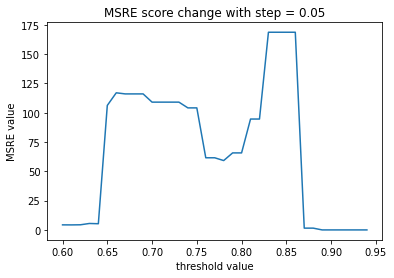

In [93]:
plt.plot(k_v,msre)
plt.title('MSRE score change with step = 0.05')
plt.xlabel('threshold value')
plt.ylabel('MSRE value')
plt.show()

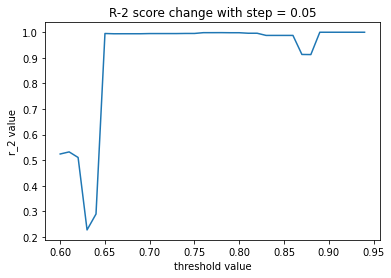

In [94]:
###DONT RUN THIS PART CODE. Just SEE the result
plt.plot(k_v,r2)
plt.title('R-2 score change with step = 0.05')
plt.xlabel('threshold value')
plt.ylabel('r_2 value')
plt.show()

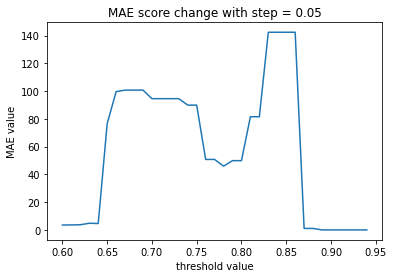

In [95]:
plt.plot(k_v,mae)
plt.title('MAE score change with step = 0.05')
plt.xlabel('threshold value')
plt.ylabel('MAE value')
plt.show()

    (Sex and Age, 10 to 14 years)  (Sex and Age, 45 to 54 years)  \
0                        5.925650                      10.755227   
1                        6.207635                      12.903531   
2                        6.252621                      11.611633   
3                        6.387783                      12.549914   
4                        6.138785                      12.817324   
5                        6.644474                      10.631721   
6                        6.548711                      13.315351   
7                        7.967942                      10.533505   
8                        8.493979                      11.950479   
9                        8.058740                      11.988223   
10                       5.886449                      13.295162   
11                       3.492198                      12.878419   
12                       5.094233                      12.419088   
13                       5.133382               

<AxesSubplot:>

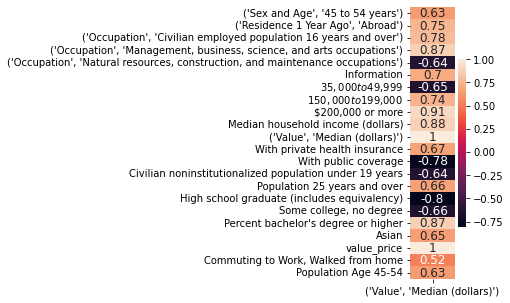

In [96]:
list_of_train =pd.concat([data_age,data_BirthPlace,data_R,data_Commuting,data_Occupation,data_Industry,data_Worker,data_Income,data_Health,data_Education,data_Race], axis=1)
list_of_train = list_of_train*100
list_of_train = list_of_train.iloc[:,0:-1]
list_of_train['value_price'] = df.loc[:,idx['Value','Median (dollars)']]
corrmat = list_of_train.corr()
abs_c = np.absolute(corrmat)
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt

def map_score(t):
    features_l = []
    temp = abs_c.iloc[-1,:]
    for i in range(97):
        if temp[i] > t:    
           features_l.append(i)
    after_threshold = list_of_train.iloc[:,features_l]
    return after_threshold

data2 = map_score(0.6)
data2 = data2.loc[:,~data2.columns.duplicated()]
print(data2)
#print(data.loc[:,[('Value', 'Median (dollars)')]])
corrmat = data.corr()
fig, ax = plt.subplots(figsize = (1, 5))
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})

<AxesSubplot:>

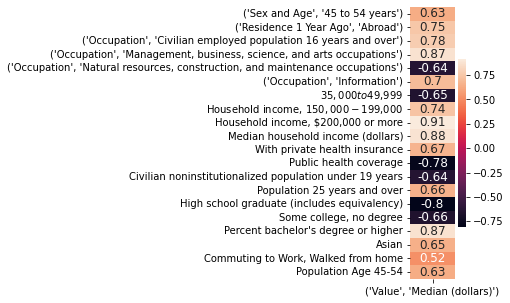

In [97]:
list_of_train =pd.concat([data_age,data_BirthPlace,data_R,data_Commuting,data_Occupation,data_Industry,data_Worker,data_Income,data_Health,data_Education,data_Race], axis=1)
list_of_train = list_of_train*100
list_of_train = list_of_train.iloc[:,0:-1]
list_of_train.drop(columns=['Bachelor\'s degree', 'Graduate or professional degree', 'Mean household income (dollars)', 'Private wage and salary workers', 'Civilian employed population 16 years and over', 'Professional, scientific, and management, and administrative and waste management services'], inplace=True)
list_of_train['value_price'] = df.loc[:,idx['Value','Median (dollars)']]
list_of_train.drop(columns=[('Place of Birth', 'State of residence')], inplace=True)

corrmat = list_of_train.corr()
abs_c = np.absolute(corrmat)
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt

def map_score(t):
    features_l = []
    temp = abs_c.iloc[-1,:]
    for i in range(abs_c.shape[1]):
        if temp[i] > t:    
           features_l.append(i)
    after_threshold = list_of_train.iloc[:,features_l]
    return after_threshold

data = map_score(0.63)
data = data.loc[:,~data.columns.duplicated()]
#print(data.loc[:,[('Value', 'Median (dollars)')]])
data['Commuting to Work, Walked from home'] = list_of_train.loc[:,[('Commuting to Work', 'Walked')]]
data['Population Age 45-54'] = list_of_train.loc[:,[('Sex and Age','45 to 54 years')]]
corrmat = data.corr()
fig, ax = plt.subplots(figsize = (1, 5))
corrmat.drop(index=[('Value', 'Median (dollars)')], inplace=True)
corrmat.drop(index=['value_price'], inplace=True)
corrmat.rename(index={'Information':"('Occupation', 'Information')", 'With public coverage':"Public health coverage", "$150,000 to $199,000":"Household income, $150,000-$199,000", "$200,000 or more":"Household income, $200,000 or more"}, inplace=True)
sns.heatmap(corrmat.loc[:,[('Value', 'Median (dollars)')]], annot = True, annot_kws={'size': 12})

In [107]:
# from sklearn.svm import SVR
# #https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
# def svd_score(X_train,X_test, y_train,y_test):
#     svr = SVR()
#     svr.fit(X_train, y_train)
#     y_pred = svr.predict(X_test)
#     return y_test,y_pred


from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

after_threshold = map_score(0.6)
app = Dash(__name__)

models = {'Regression': linear_model.LinearRegression,
          'Decision Tree': tree.DecisionTreeRegressor,
          'k-NN': neighbors.KNeighborsRegressor}

app.layout = html.Div([
    html.H4("Predicting restaurant's revenue"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=["Regression", "Decision Tree", "k-NN"],
        value='Decision Tree',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input('dropdown', "value"))
def train_and_display(name):
    df = px.data.tips() # replace with your own data source
    X = data2.iloc[:,0:-1]

    y =data2.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

    model = LinearRegression()
    model.fit(X_train, y_train)
    X = after_threshold.columns[:-1]
    x_range = np.linspace(0, 6200, 100)
    y_range = np.linspace(20000, 1700000, 10000)
    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])
    return fig

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [137]:
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print(px.colors.qualitative.Set3)
X = data2.iloc[:,0:-1]

y =data2.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
X = after_threshold.columns[:-1]
x_range = np.linspace(0, 6200, 100)
y_range = model.predict(X_test)
print(y_range)
x1 = X_test.squeeze().copy()
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x1, y=y_range, name='prediction by LinearRegression',marker_color='rgba(200, 100, 1, 100.8)',opacity=0.2)
])
fig.show()

['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)', 'rgb(204,235,197)', 'rgb(255,237,111)']
[ 775300.  214400.  770100.  390400.  666600. 1161400.  717000.  555700.
  694400.  578600.  583600.  270000.  858500.  583900.  882900.  356100.]


C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [138]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = data2.iloc[:,0:-1]

y =data2.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    #导入需要的模块

model = RandomForestRegressor()                   
model.fit(X_train, y_train)
x_range = np.linspace(0, 6200, 100)
y_range = model.predict(X_test)
print(y_range)
x1 = X_test.squeeze().copy()
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x1, y=y_range, name='prediction by RandomForestRegressor',marker_color='rgba(200, 100, 1, 100.8)',opacity=0.4)
])
fig.show()

[ 986797.  574406. 1020120.  626581.  328248.  593159.  369857.  640529.
  457080.  725473.  793994.  379527. 1021886.  679979.  579043.  934909.]


C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [128]:

import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X = data2.iloc[:,0:-1]

y =data2.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    #导入需要的模块

model = GradientBoostingRegressor()                   
model.fit(X_train, y_train)
x_range = np.linspace(0, 6200, 100)
y_range = model.predict(X_test)
print(y_range)
x1 = X_test.squeeze().copy()
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x1, y=y_range, name='prediction by GradientBoostingRegressor',marker_color='rgba(200, 100, 1, 100.8)',opacity=0.4)
])
fig.show()

[ 324307.63134614 1334508.86904882  807992.40796664  700086.75275136
 1051666.09410224  333732.1335376   582969.52622016  306225.66022325
  336879.86862169  608178.82224654  548637.99289844  841533.85319553
  931167.55616841 1274638.80121001  474132.10310398  264671.42365463]


C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

C:\Users\kicph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

